# Actividad 7 y 8
* Descargar bases de datos.

* Aplicación de redes neuronales completamente
conectadas en problemas de clasificación utilizando Keras.



---
Por: Ángela Daniela Córdoba Álvarez


---




En este caso estaré haciendo uso del dataset sobre 'Breast Cancer' sacado de UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# Cargamos el dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Pandas dataframes
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

print(breast_cancer_wisconsin_diagnostic.metadata)
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [3]:
# Verificamos la estructura del dataset

import pandas as pd

# Pasamos los datos a DataFrame
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y, columns=['target'])

# Verificamos las dimensiones
print("Dimensiones de X:", X_df.shape)
print("Dimensiones de y:", y_df.shape)

# Usamos display para que al momento de imprimir, la salida se vea más "estética"
display(X_df.head())
display(y_df.head())

Dimensiones de X: (569, 30)
Dimensiones de y: (569, 1)


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,target
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [4]:
# Verificar las dimensiones y tipo de datos
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

# Verificar si hay NaN en los datos
print("NaN en X:", pd.DataFrame(X).isna().sum().sum())
print("NaN en y:", pd.DataFrame(y).isna().sum().sum())

# Verificar el contenido de y
print(y[:10])


Dimensiones de X: (569, 30)
Dimensiones de y: (569, 1)
NaN en X: 0
NaN en y: 0
  Diagnosis
0         M
1         M
2         M
3         M
4         M
5         M
6         M
7         M
8         M
9         M


In [5]:
import pandas as pd

# Convertir los datos a DataFrames de pandas si es necesario
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y, columns=['target'])

# Asegurarse de que no haya NaN en los datos
X_df.dropna(inplace=True)
y_df.dropna(inplace=True)

# Verificar las dimensiones de X y y
print(f"Dimensiones de X: {X_df.shape}")
print(f"Dimensiones de y: {y_df.shape}")

# Mostrar las primeras filas para asegurarse de que los datos se cargaron correctamente
display(X_df.head())
display(y_df.head())


Dimensiones de X: (569, 30)
Dimensiones de y: (0, 1)


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,target


In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (455, 30)
Tamaño de X_test: (114, 30)
Tamaño de y_train: (455, 1)
Tamaño de y_test: (114, 1)


In [7]:
# Escalar las características del dataset
# Normalización de los datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Construir y entrenar el modelo

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Codificar las etiquetas de la variable objetivo
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

model = Sequential()
model.add(Dense(30, input_dim= X_train.shape[1], activation='relu')) # Capa de entrada
model.add(Dense(15, activation='relu')) # Capa oculta
model.add(Dense(1, activation='sigmoid')) # Capa de salida
# model.add(Dense(2, activation='softmax')) # Clas. binaria

# Compilar el modelo

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo

history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/50
46/46 [==============================] - 3s 3ms/step - loss: 0.5648 - accuracy: 0.7209
Epoch 2/50
46/46 [==============================] - 0s 6ms/step - loss: 0.2339 - accuracy: 0.9538
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 0.1381 - accuracy: 0.9714
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0988 - accuracy: 0.9780
Epoch 5/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0796 - accuracy: 0.9802
Epoch 6/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0681 - accuracy: 0.9802
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9846
Epoch 8/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0547 - accuracy: 0.9846
Epoch 9/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0497 - accuracy: 0.9846
Epoch 10/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0443 - accuracy: 0.9868
Epoch 11/50
46/46 [

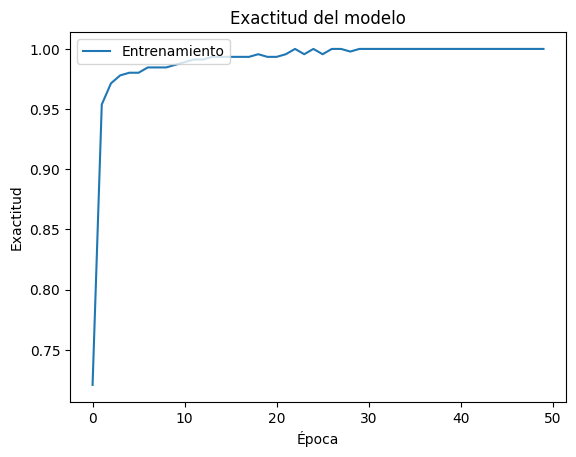

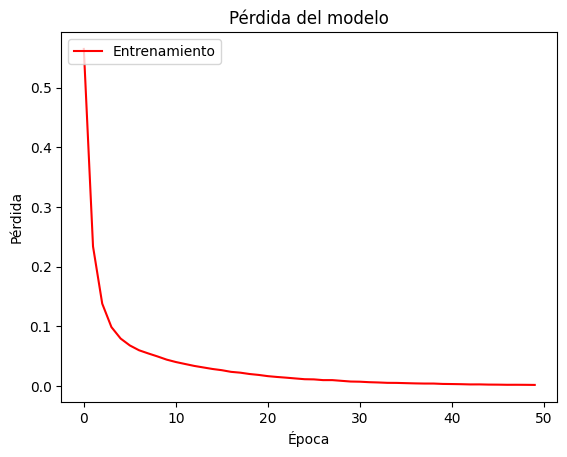

In [9]:
# Ahora, visualizamos los resultados del entrenamiento

import matplotlib.pyplot as plt

# Graficar la exactitud del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'], color='red')
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()


In [10]:
# Evaluar el modelo en el conjunto de prueba

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss:.4f}')
print(f'Precisión en el conjunto de prueba: {accuracy:.4f}')

4/4 [==============================] - 0s 4ms/step - loss: 0.1178 - accuracy: 0.9737
Pérdida en el conjunto de prueba: 0.1178
Precisión en el conjunto de prueba: 0.9737


In [11]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Convertir las probabilidades en clases predichas (0 o 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Comparar algunas predicciones con los valores reales
print("Ejemplos de predicciones vs. valores reales:")
for i in range(5):
    print(f"Predicción: {y_pred_classes[i]}, Valor Real: {y_test[i]}")

# Evaluar métricas adicionales
from sklearn.metrics import classification_report

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_classes))

4/4 [==============================] - 0s 4ms/step
Ejemplos de predicciones vs. valores reales:
Predicción: [0], Valor Real: 0
Predicción: [1], Valor Real: 1
Predicción: [1], Valor Real: 1
Predicción: [0], Valor Real: 0
Predicción: [0], Valor Real: 0

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [12]:
# Guardamos el modelo
model.save('breast_cancer_model.h5')

# Lo cargamos para en un futuro poder hacer predicciones sin necesidad de volver a entrenar el modelo
from keras.models import load_model
model = load_model('breast_cancer_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
# Error entre las predicciones y valores reales
error = y_pred - y_test
print(error)

[[ 4.80074110e-03 -9.95199259e-01 -9.95199259e-01 ...  4.80074110e-03
   4.80074110e-03 -9.95199259e-01]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 9.99999046e-01 -9.53674316e-07 -9.53674316e-07 ...  9.99999046e-01
   9.99999046e-01 -9.53674316e-07]
 ...
 [ 9.05349623e-07 -9.99999095e-01 -9.99999095e-01 ...  9.05349623e-07
   9.05349623e-07 -9.99999095e-01]
 [ 1.07347507e-04 -9.99892652e-01 -9.99892652e-01 ...  1.07347507e-04
   1.07347507e-04 -9.99892652e-01]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]]


<function matplotlib.pyplot.show(close=None, block=None)>

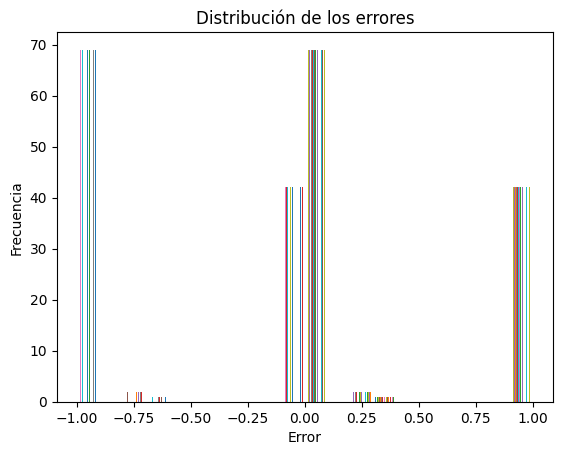

In [14]:
# Visualizar distribución de los errores (magnitud y dirección en predicciones)
import matplotlib.pyplot as plt

plt.hist(error, bins=20)
plt.title('Distribución de los errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show

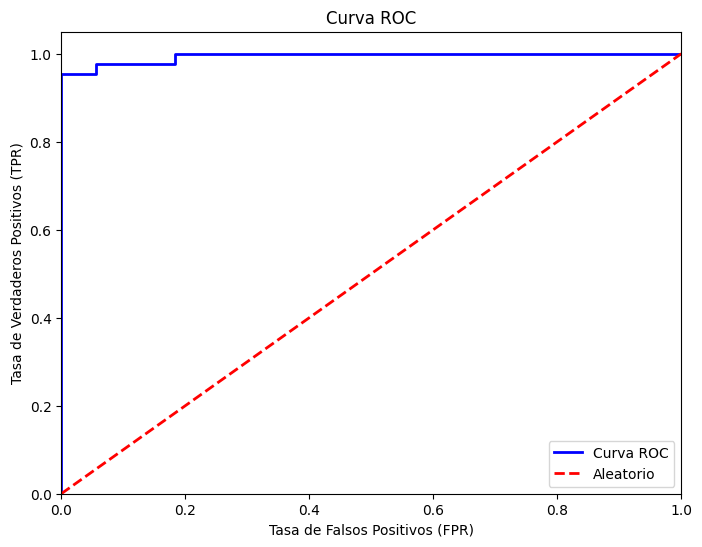

In [15]:
# Curva ROC (rendimiento del modelo)
from sklearn.metrics import roc_curve, auc

# Obtener la curva
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [16]:
# Área bajo la curva ROC (AUC)
# Cuantifica la habilidad de un modelo para distinguir entre clases

auc = auc(fpr, tpr)
print(f'Área bajo la curva ROC: {auc:.4f}')

Área bajo la curva ROC: 0.9944


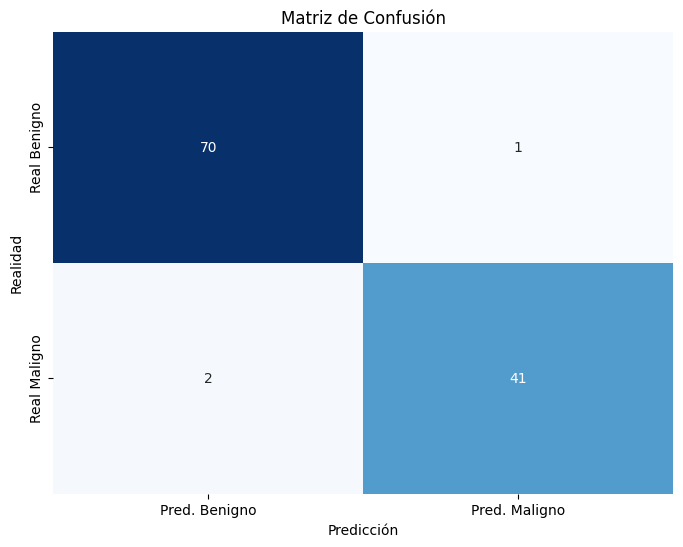

In [17]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión como un heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Pred. Benigno', 'Pred. Maligno'], yticklabels=['Real Benigno', 'Real Maligno'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()